In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#lets read the dataset
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')

In [4]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# lets find some statistical information
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# lets find the data type information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#lets know wheter there are null values are not
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# lets drop the column "date_time"
train =train.drop(columns = 'datetime',axis = 1)

In [9]:
#lets find the outliers using the box plot or else the inter quartiile range

In [10]:
#lets use the box plot

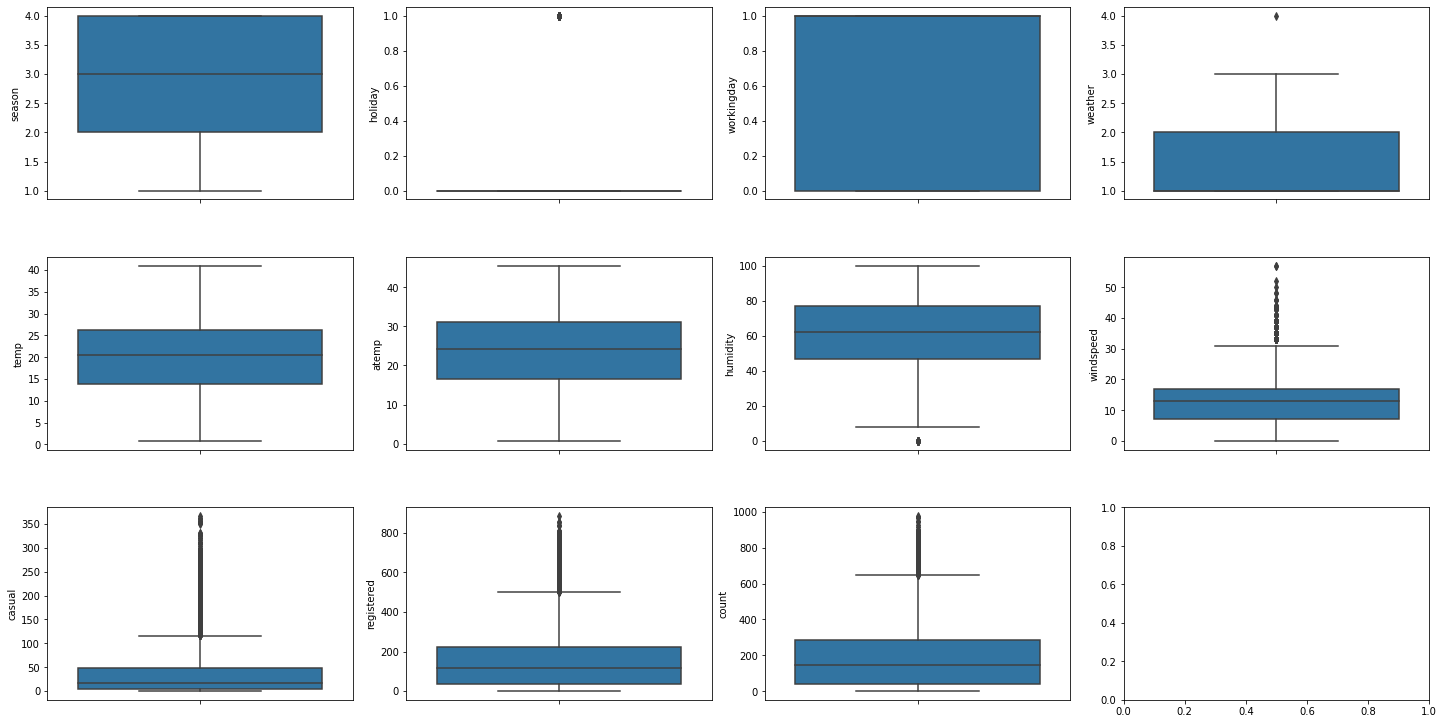

In [11]:
fig,ax = plt.subplots(ncols = 4,nrows= 3,figsize =(20,10))
ax = ax.flatten()
index= 0
for col,values in train.items():
    sns.boxplot(y = col,data =train, ax = ax[index])
    plt.tight_layout(pad = 0.5,w_pad = 0.7,h_pad = 5.0)
    index+=1

In [12]:
cols = ['casual','registered','count','weather','holiday']

In [13]:
# lets try to fill those all values with some mean values or the some other value.
# for that lets find the  on which rows we do have the outlier values. inorder to find the outliers  and their positions lets use the 
#method called Inter quartile range
# for executing this method we need to find the percentiles

In [14]:
#lets  do for a single column

In [15]:

def percentile(x,rand1,rand2):
    percentile1 = np.percentile(x,25)
    percentile2 = np.percentile(x,75)
    difference = percentile2-percentile1
    min = percentile1- 1.5*difference
    max = percentile2+1.5*difference
    index = list(x.index[(x<min)|(x>max)])
    rand1.append(index)
    values = list(x[index])
    rand2.append(values)
    print(index)
    

    

In [16]:
#now lets try to find the index of that particular row
rand1 =[]
rand2 =[]
percentile(train['windspeed'],rand1,rand2)

[175, 178, 194, 196, 265, 271, 471, 472, 473, 474, 479, 604, 605, 606, 608, 612, 613, 705, 749, 750, 752, 753, 754, 756, 757, 758, 760, 761, 762, 848, 850, 853, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 873, 874, 875, 919, 920, 923, 924, 929, 1015, 1017, 1022, 1023, 1108, 1151, 1307, 1313, 1380, 1409, 1410, 1411, 1412, 1413, 1415, 1423, 1427, 1428, 1433, 1437, 1440, 1456, 1577, 1578, 1579, 1582, 1595, 1601, 1674, 1694, 1695, 1696, 1697, 1699, 1721, 1838, 1839, 1840, 1853, 1887, 1889, 2268, 2274, 2275, 2525, 2755, 2756, 2963, 3200, 3307, 3479, 3480, 3595, 3596, 3720, 3953, 4403, 4406, 4494, 4495, 4496, 4594, 4760, 4761, 4763, 4812, 5129, 5130, 5131, 5314, 5456, 5480, 5481, 5482, 5483, 5485, 5487, 5712, 5713, 5719, 5720, 5721, 5722, 5723, 5817, 5818, 5819, 5829, 5830, 5831, 5832, 5833, 5839, 5842, 5843, 5916, 5918, 5919, 6132, 6133, 6134, 6135, 6137, 6140, 6141, 6142, 6150, 6152, 6153, 6417, 6418, 6419, 6420, 6421, 6444, 6449, 6491, 6511, 6512, 6513, 6514, 6515, 6516, 6523, 

In [17]:
rand3 =[]
rand4 =[]
percentile(train['casual'],rand1,rand2)

[1173, 1174, 1175, 1311, 1312, 1313, 1314, 1315, 1316, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1532, 1552, 1553, 1554, 1555, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1791, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1957, 1958, 1959, 1960, 1961, 1962, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2487, 2488, 2489, 2490, 2491, 2492, 2508, 2509, 2510, 2513, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3277, 3278, 3279, 3280, 3281, 3282, 3302, 3303, 3304, 330

In [18]:
rand5 =[]
rand6 =[]
percentile(train['registered'],rand1,rand2)

[1987, 2011, 2059, 2179, 2371, 2539, 2540, 2587, 2588, 2827, 3019, 3034, 3379, 3523, 3524, 3547, 3619, 3880, 3881, 3904, 3928, 3929, 4144, 4168, 4169, 4192, 4312, 4456, 4480, 4481, 4551, 5883, 5892, 5893, 6026, 6036, 6194, 6203, 6218, 6266, 6338, 6347, 6362, 6482, 6491, 6492, 6506, 6515, 6516, 6601, 6610, 6611, 6625, 6634, 6635, 6649, 6658, 6659, 6673, 6682, 6683, 6697, 6769, 6778, 6779, 6816, 6825, 6826, 6840, 6849, 6850, 6864, 6873, 6874, 6888, 6897, 6898, 6984, 6993, 6994, 7008, 7017, 7018, 7031, 7040, 7041, 7055, 7064, 7065, 7079, 7088, 7089, 7151, 7160, 7161, 7175, 7184, 7185, 7199, 7223, 7232, 7233, 7234, 7247, 7256, 7257, 7271, 7280, 7281, 7295, 7304, 7305, 7319, 7328, 7329, 7391, 7400, 7401, 7415, 7424, 7425, 7439, 7448, 7463, 7472, 7473, 7487, 7496, 7497, 7592, 7593, 7607, 7616, 7617, 7631, 7640, 7641, 7655, 7664, 7665, 7703, 7774, 7775, 7784, 7785, 7786, 7798, 7799, 7808, 7809, 7822, 7823, 7832, 7833, 7846, 7847, 7856, 7857, 7858, 7871, 7880, 7881, 7943, 7952, 7953, 7954, 796

In [19]:
for i in rand1:
    train['windspeed'][i] = train['windspeed'].mean()
for i in rand3:
    train['casual'][i] = train['casual'].mean()
    

In [20]:
#lets plot a box plot to check whether the outliers could have removed or not

<AxesSubplot:xlabel='casual'>

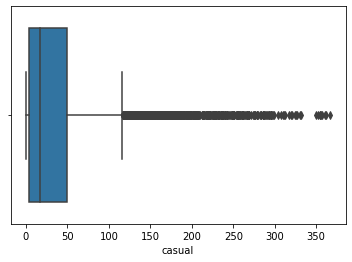

In [21]:

sns.boxplot(train['casual'])

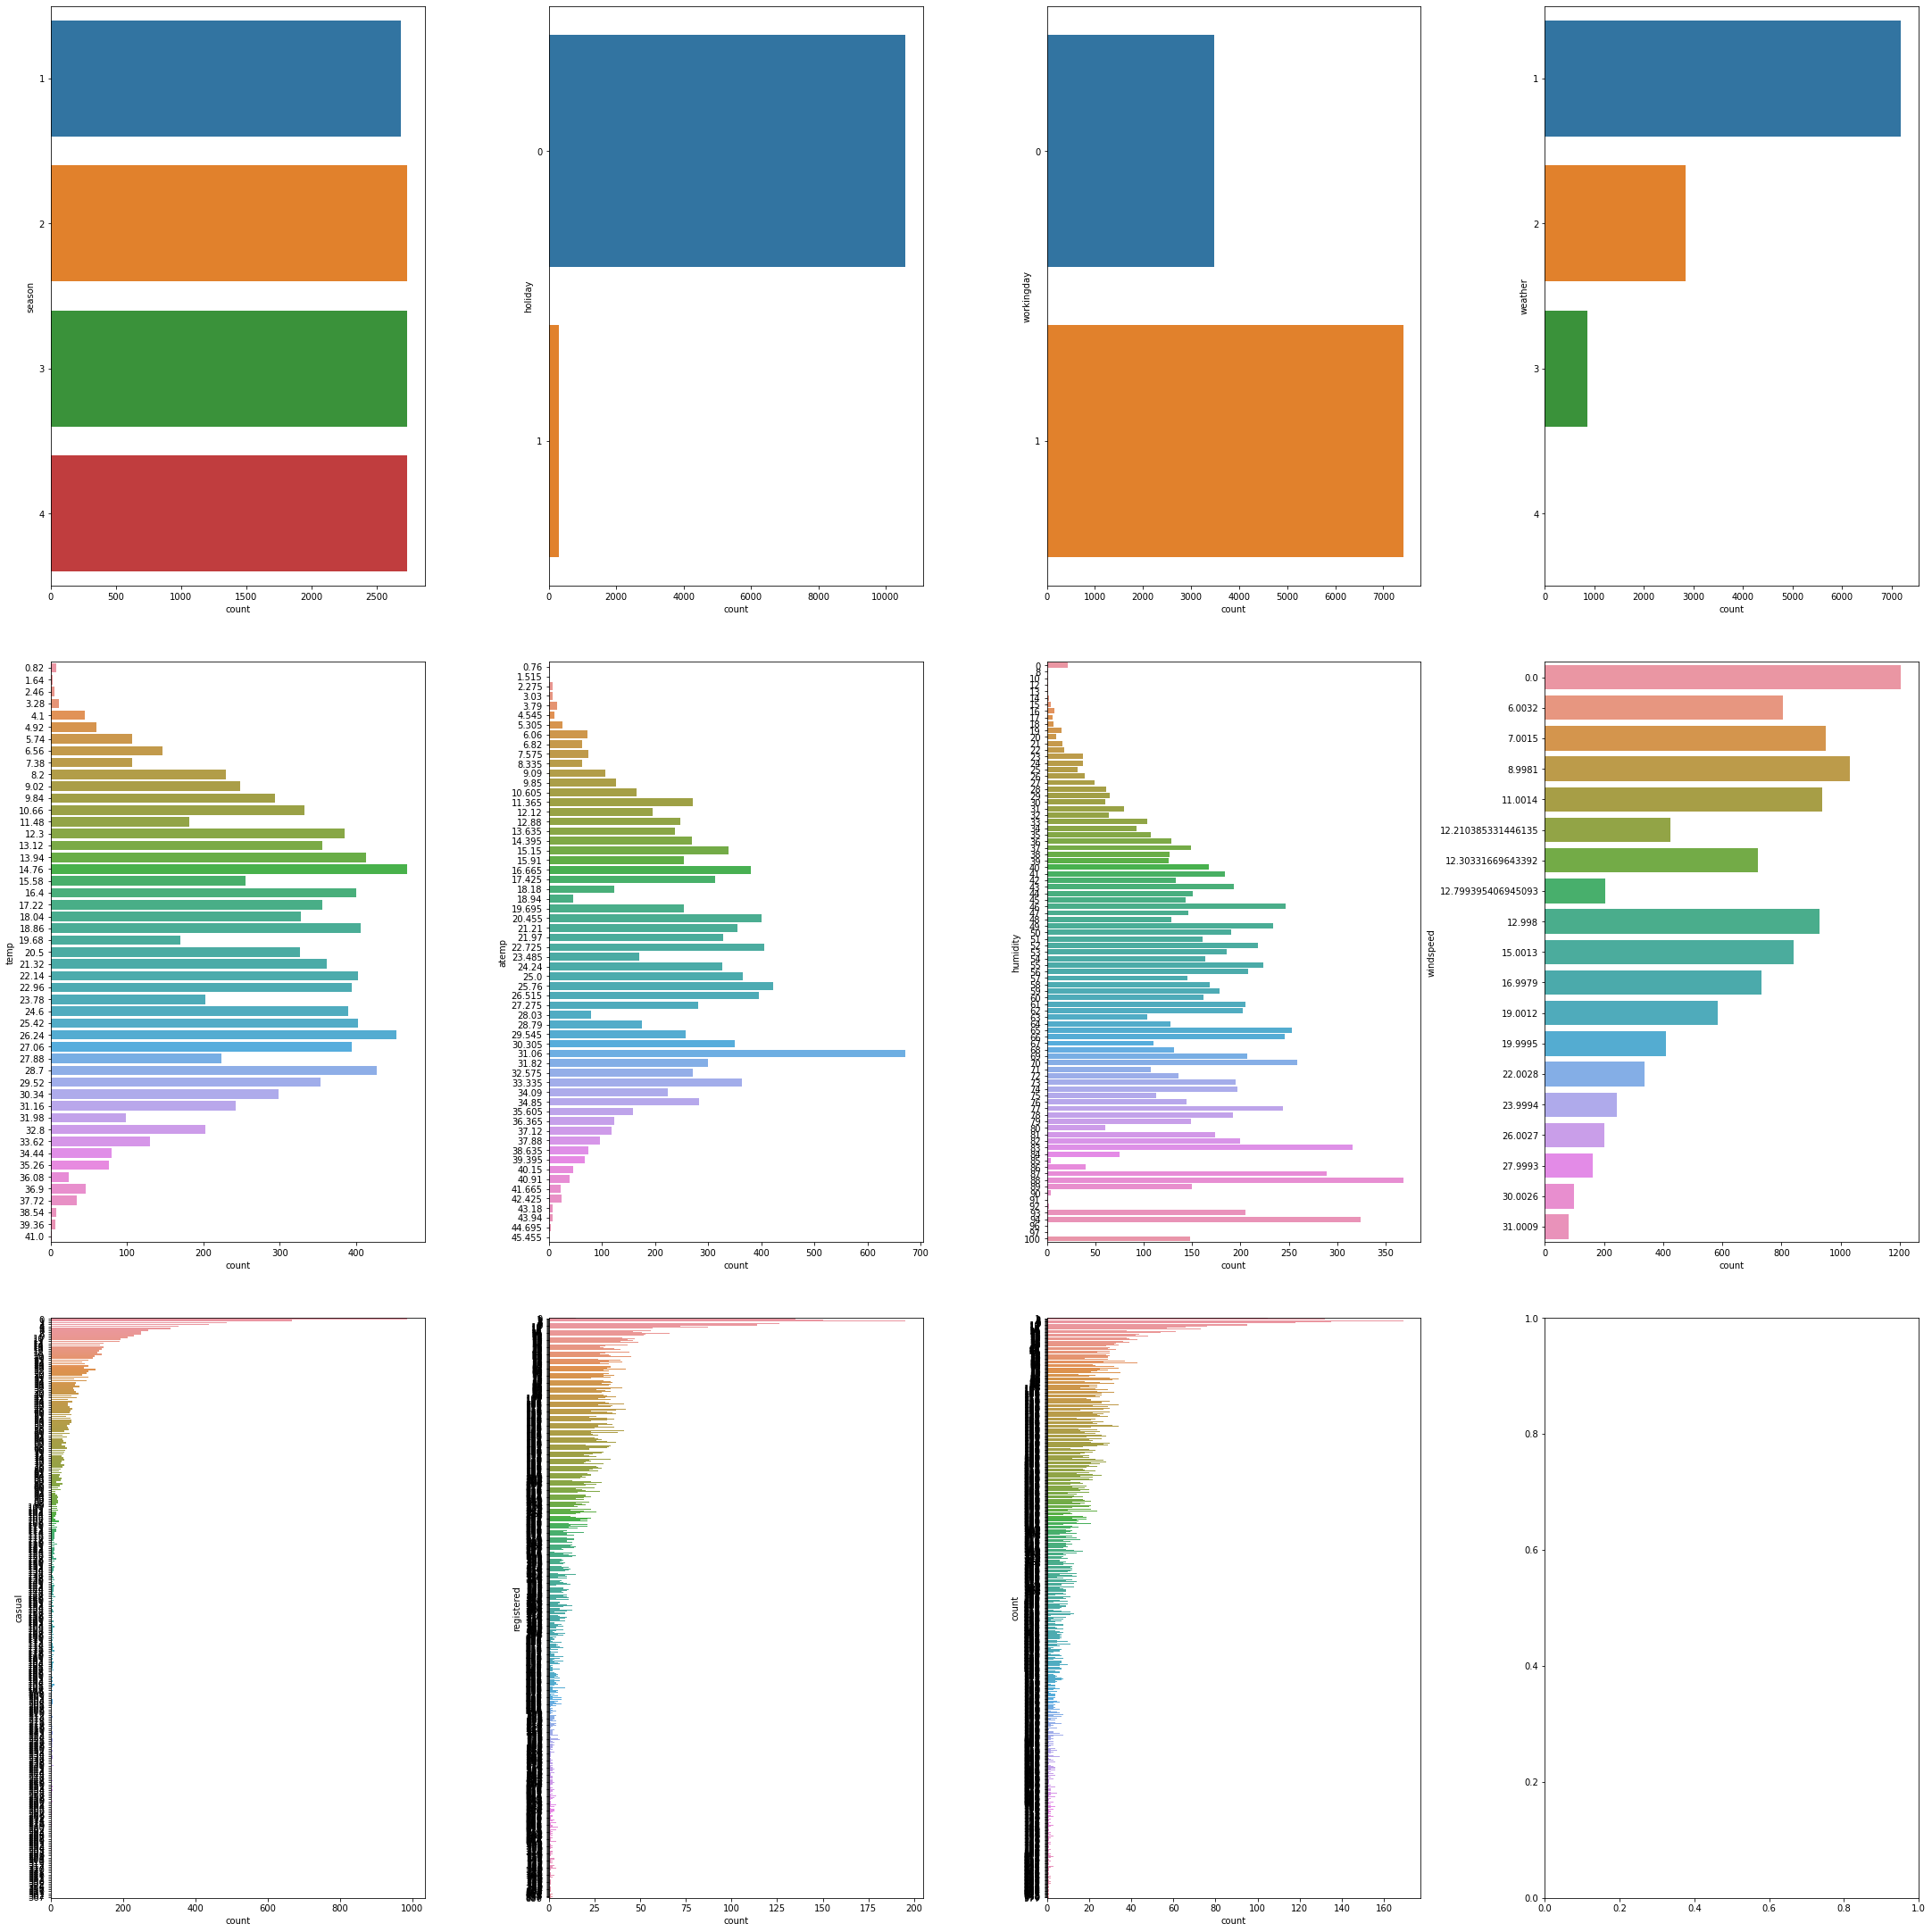

In [22]:
fig, ax = plt.subplots(nrows = 3,ncols = 4,figsize =(30,30) )
ax = ax.flatten()
index=0
for col,values in train.items():
    sns.countplot(y = col,data = train,ax=ax[index])
    plt.tight_layout(pad = 0.5,w_pad =0.7,h_pad= 5.0)
    index+=1

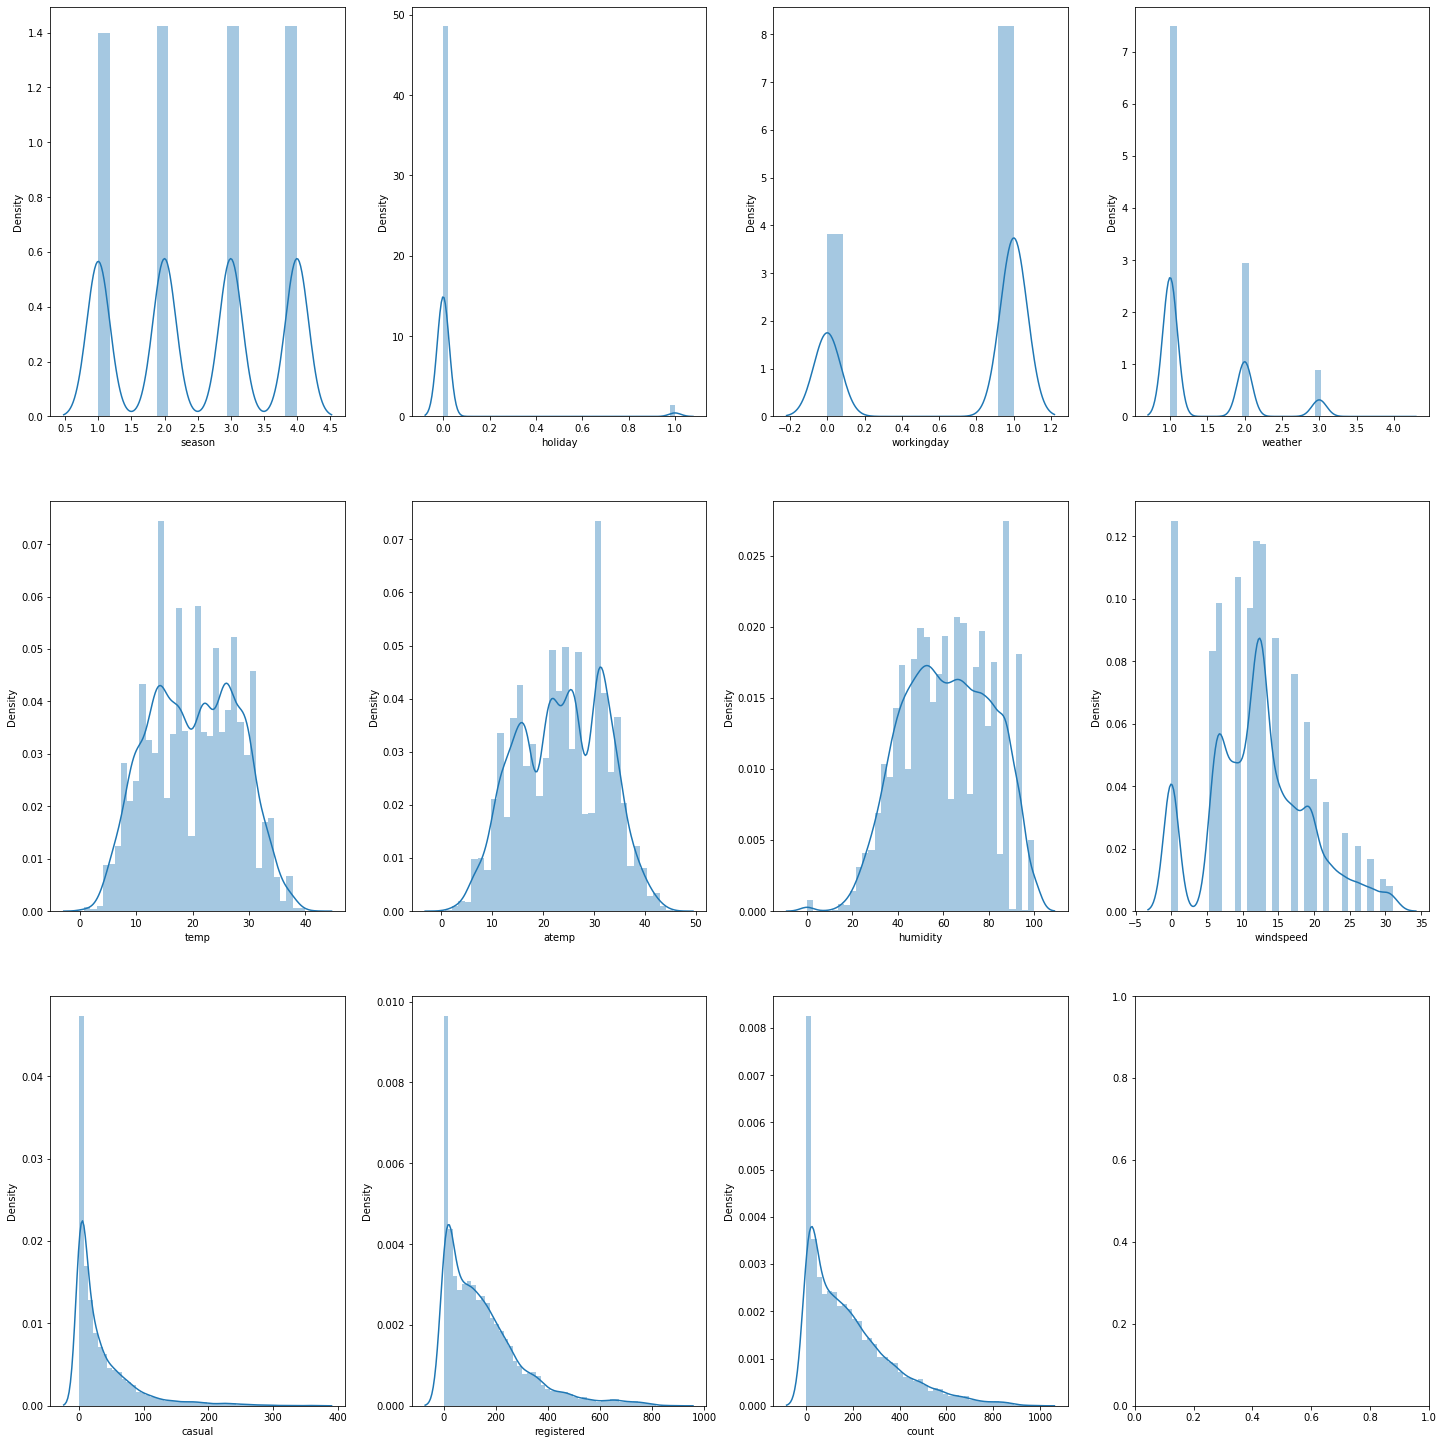

In [23]:
# now lets plot the distribution plots
fig,ax = plt.subplots(nrows = 3,ncols = 4,figsize = (20,20))
ax = ax.flatten()
index =0
for col,values in train.items():
    sns.distplot(values,ax = ax[index])
    plt.tight_layout(pad = 0.5,w_pad= 0.7,h_pad = 5.0)
    index+=1

<AxesSubplot:xlabel='weather'>

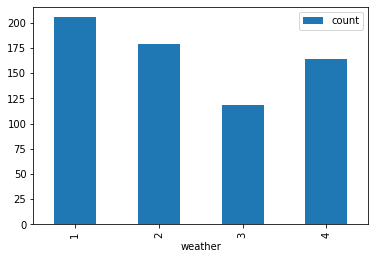

In [24]:
#lets do the bi-variate analysis
pivot = train.pivot_table(values = 'count',index = 'weather')
pivot.plot(kind = 'bar') 

[Text(0.5, 1.0, 'point plot')]

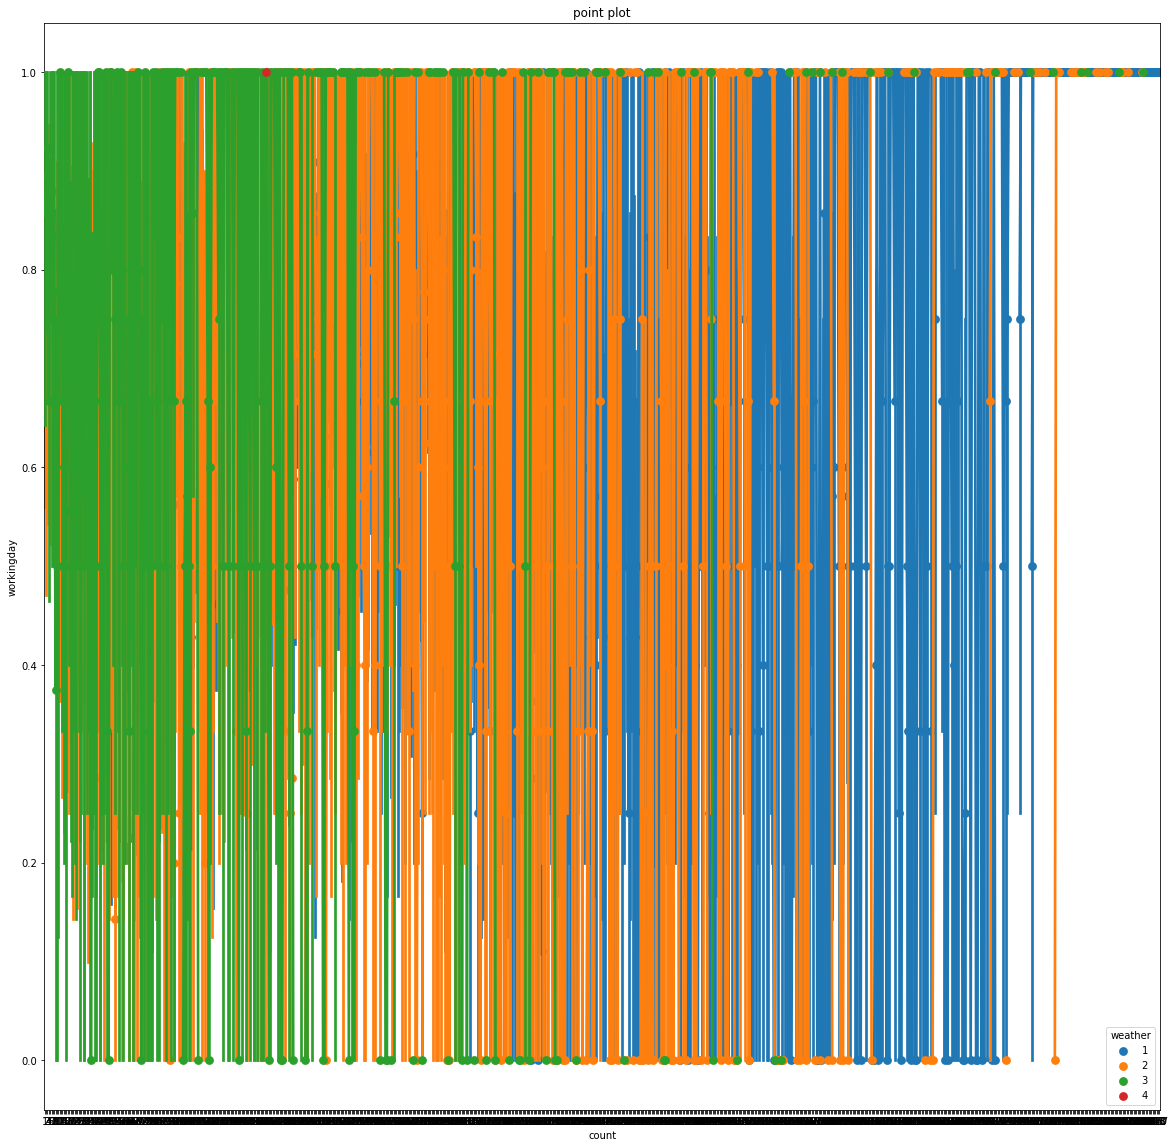

In [25]:
fig, ax =plt.subplots(figsize =(20,20))
sns.pointplot(data =train, x = 'count',y ='workingday',hue ='weather',ax =ax)
ax.set(title = 'point plot')

<AxesSubplot:>

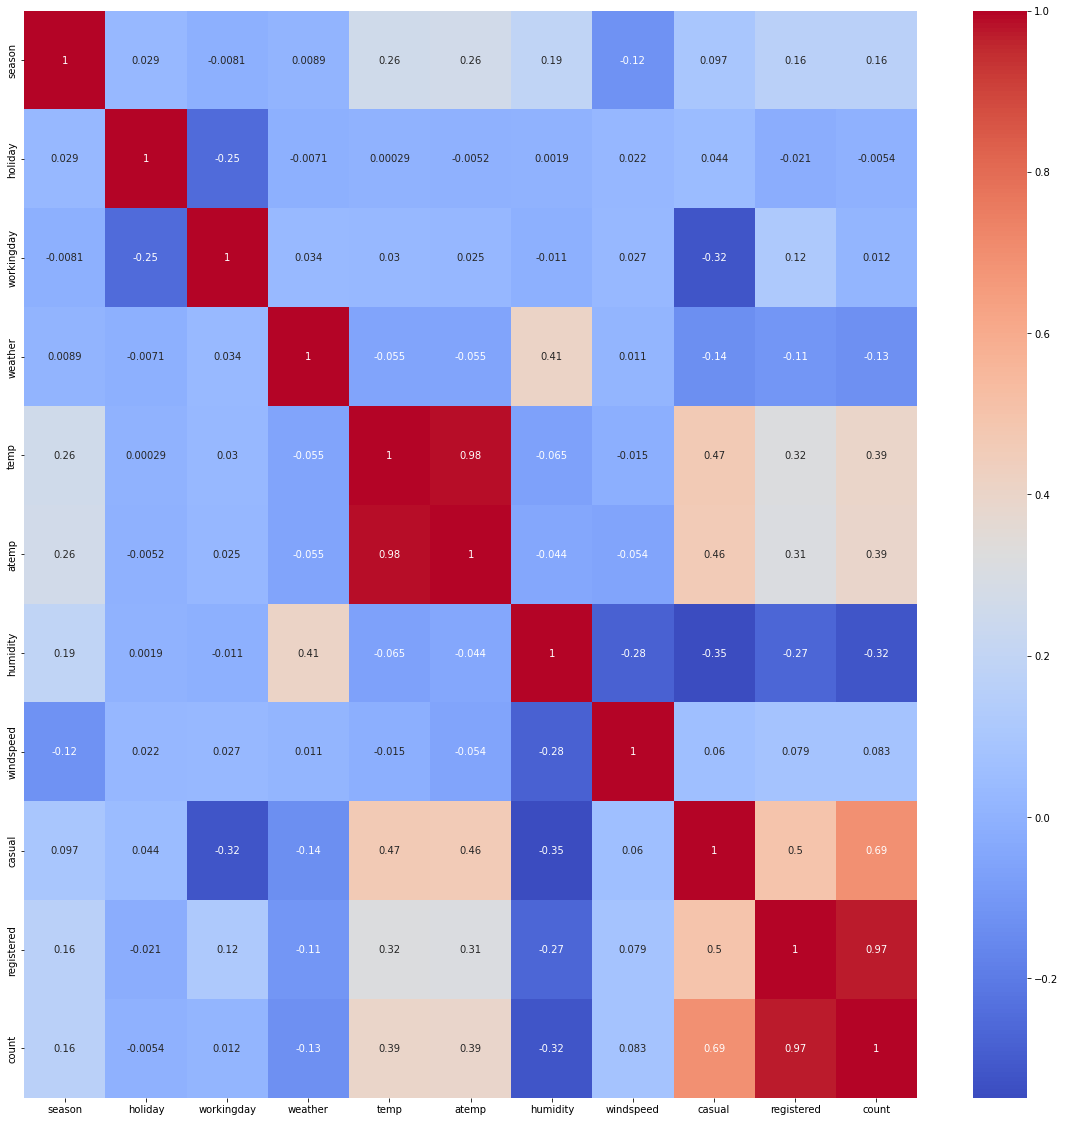

In [26]:
#correlation
plt.figure(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr,annot= True, cmap = 'coolwarm')

<AxesSubplot:xlabel='count', ylabel='registered'>

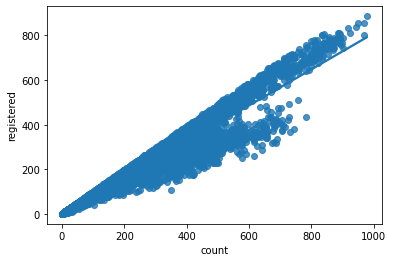

In [27]:
#regression plots
sns.regplot(data = train,x = 'count',y = 'registered')

In [28]:
train['season'] = train['season'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 935.6+ KB


In [29]:
#lets do the one hot encoding buy using the geet dummies method in pandas 

train1 = pd.concat([train,pd.get_dummies(train['season'])],axis =1)
train1 =train1.drop(columns ='season',axis =1)

In [30]:
train1['season1'] = train1[1]
train1['season2'] = train1[2]
train1['season3'] = train1[3]
train1['season4'] = train1[4]


In [31]:
train1.head(10)
train1 =train1.drop(columns = [1,2,3,4],axis =1)

In [32]:
train1.shape

(10886, 14)

In [33]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [34]:
test['season'] = test['season'].astype('object')
test1 = pd.concat([test,pd.get_dummies(test['season'])],axis =1)

In [35]:
test1['season1'] = test1[1]
test1['season2'] = test1[2]
test1['season3'] = test1[3]
test1['season4'] = test1[4]


In [36]:
test1.head(10)
test1 =test1.drop(columns = [1,2,3,4,'datetime'],axis =1)
test1.shape

(6493, 12)

In [37]:
cols = ['season1','season2','season3','season4']
def labelencoder(le,cols):
    le.fit_transform(cols)


In [38]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cols:
    labelencoder(le,train1[col])

In [39]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cols:
    labelencoder(le,test1[col])

In [40]:
train1.head(10)
train1=train1.drop(columns = 'casual',axis =1)

In [41]:
train1.head()
train1.shape

(10886, 13)

In [42]:
x_train = train1.drop(columns = 'count',axis =1)
y_train= train1['count']
y_train.head()
test1.shape

(6493, 12)

In [43]:
x_train.shape

(10886, 12)

In [44]:
x_train.shape

(10886, 12)

In [45]:
merge = pd.concat([x_train,test1],axis=1)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def prediction(model,x_train,y_train,x_test,merge):
    model.fit(x_train,y_train)
    model.predict(x_test)
    score = cross_val_score(model,merge,y_train,cv =5)
    series = pd.Series(model.coef_,x_train.columns).sort_values()
    
    
    print(np.mean(series))
    series.plot(kind ='bar')




In [48]:
predict

NameError: name 'predict' is not defined

In [ ]:

prediction(model,x_train,y_train,test1,merge)

In [ ]:
predict = model.predict(test1)
predict.shape

In [ ]:
submit = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
submit.head

In [ ]:
submit['datetime'] = test['datetime']
submit.head(10)

In [ ]:
submit.to_csv('result',index =False)

In [ ]:
submit.head(10)